# Example Notebook

## Load Sample Data

Please download the data from [here](https://jp.freepik.com/free-psd/ramadan-mubarak-islamic-greetings-social-media-post-template_126726406.htm#&position=25&from_view=popular&uuid=7b635cda-4b7e-49a3-ba99-bc9537795d6f) and put it in the `data` folder.

PSDImage(mode=ColorMode.RGB size=1080x1080 depth=8 channels=3)
  [0] Group('Background' size=1080x1080)
    [0] SolidColorFill('Background Color' size=1080x1080)
    [1] SolidColorFill('BG Color' size=1080x1080 mask)
    [2] GradientFill('Shadow' size=1080x1080 mask)
  [1] Group('Object' size=1321x1203)
    [0] PixelLayer('Reflection' size=804x444 mask)
    [1] PixelLayer('Shadow' size=1321x336)
    [2] SolidColorFill('Object 5' size=1080x833 mask)
    [3] PixelLayer('Object 4' size=1080x472 effects)
    [4] PixelLayer('Object 3' size=1080x155)
    [5] PixelLayer('Object 2' size=1040x384)
    [6] PixelLayer('Object 1' size=804x444)
  [2] Group('Text' size=877x873)
    [0] Group('Button' size=178x48)
      [0] ShapeLayer('Rectangle' size=178x48)
      [1] TypeLayer('SHOP NOW' size=127x14)
    [1] Group('Contact' size=234x47)
      [0] TypeLayer('+123 465 789 00' size=234x18)
      [1] TypeLayer('Call For More Info:' size=209x17)
    [2] Group('Website' size=260x51)
      [0] TypeLayer('

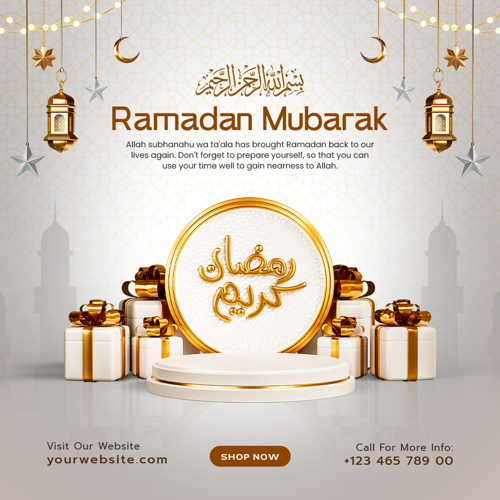

In [1]:
from IPython.display import display
from psd_tools import PSDImage
from PIL.Image import Image as PILImage

psd_image = PSDImage.open("data/banner.psd")
# compose image
image: PILImage = psd_image.composite()  # type: ignore


def _display(*args):
    for arg in args:
        if isinstance(arg, PILImage):
            # resize image for display
            display(arg.resize((500, 500)))
        else:
            display(arg)


_display(psd_image, image)

<a href="https://jp.freepik.com/free-psd/ramadan-mubarak-islamic-greetings-social-media-post-template_126726406.htm#&position=25&from_view=popular&uuid=7b635cda-4b7e-49a3-ba99-bc9537795d6f">Author: xvector</a> / Dictionary: Freepik

## Visualize Layout

In [2]:
# setup
from layout_visualizer import draw_label_bboxes


# psd layer iterator
def _iterate_last_layer(layer):
    if layer.is_group():
        for child in layer:
            yield from _iterate_last_layer(child)
    else:
        yield layer

### Simple Usage

▼ label_bboxes sample
[('Background Color', (0, 0, 1080, 1080)), ('BG Color', (0, 0, 1080, 1080)), ('Shadow', (0, 0, 1080, 1080))]


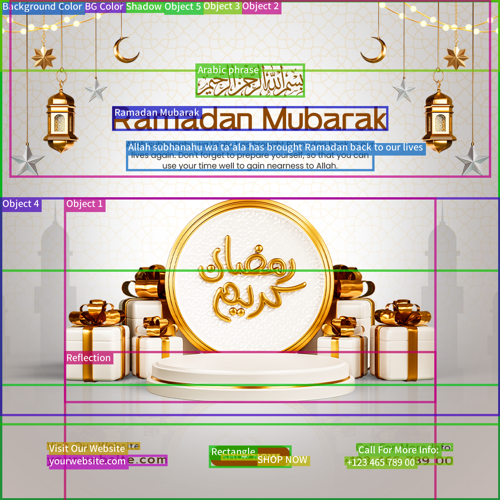

In [3]:
label_bboxes = [(layer.name, layer.bbox) for layer in _iterate_last_layer(psd_image)]

print("▼ label_bboxes sample")
print(label_bboxes[:3])
# If the label overlaps with other labels, it is shifted to the right.
_display(draw_label_bboxes(image, label_bboxes, font_size=20, line_width=5))

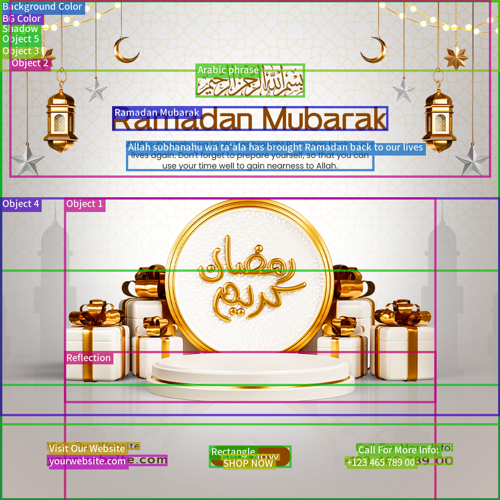

In [4]:
# You can also specify that the label be shifted down.
_display(
    draw_label_bboxes(
        image, label_bboxes, font_size=20, line_width=5, avoid_label_to="bottom"
    )
)

### ColorMap

- The color of the BBox can be specified by using `bg_color_map` to specify a dictionary, or a function that takes a label text as input.
- By default, a unique color is generated from the label text hash.

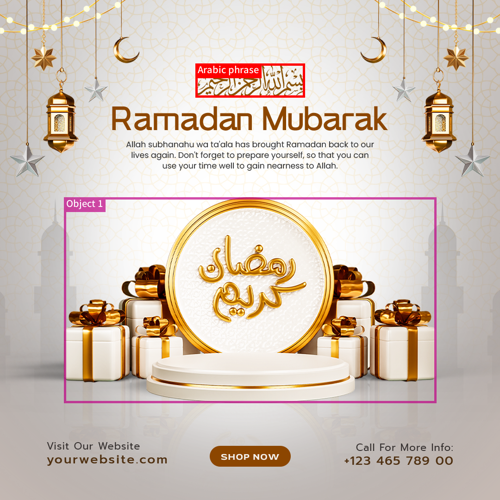

In [5]:
# Extract a label bbox for simple example
_label_bboxes = [lb for lb in label_bboxes if lb[0] in ["Arabic phrase", "Object 1"]]


# Colormap as dictionary format.
color_map_dict = {"Arabic phrase": "red"}

_display(
    draw_label_bboxes(
        image, _label_bboxes, font_size=20, line_width=5, bg_color_map=color_map_dict
    )
)

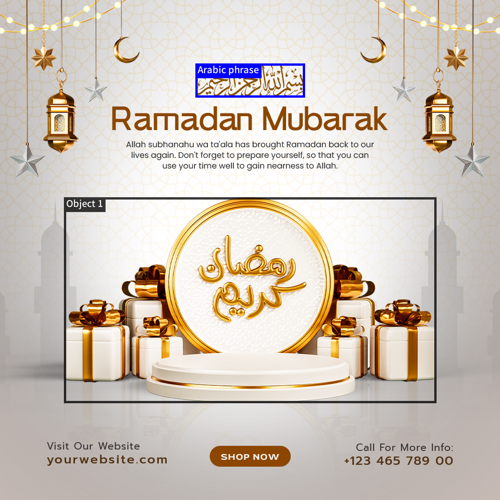

In [6]:
from layout_visualizer import Color


# Colormap as callable format
def my_color_map(label: str) -> Color:
    if label == "Arabic phrase":
        return "blue"
    return (0, 0, 0, 200)


_display(
    draw_label_bboxes(
        image, _label_bboxes, font_size=20, line_width=5, bg_color_map=my_color_map
    )
)